# A Comprehensive Study and Analysis of Delays in the Aviation Industry of the United States: Analyse Descriptive Statistics of Data.

#### During this notebook we intended to import data, clean it, extract knowledge from the data as well as to create good quality figures from which the information would be easily accessible at a first glance. Graphics are surely the most powerful tool to achieve that goal, and mastering visualization techniques thus seems important.

#### First, we load all the packages that will be needed during this project:

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#### The first file we have read is the details about the Airports from where the flights are orginating, it's destination, Passengers, Seats, Flights, Distance, Date, Longitude and latitude of the airports.

In [2]:
df = pd.read_csv("data/Airports2.csv")

In [3]:
df.head(5)

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001


#### The next file we have read from is the all the flight details in year 2018 into dataframe name df1 and printed the shape of the dataframe.

In [4]:
df1 = pd.read_csv("data/2018.csv")
df1.shape

(7213446, 28)

#### We can see that this dataframe have 7216446 flight details and 28 columns that are mentioned below:

In [5]:
df1.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

##### There are total 28 columns, we do not need some columns like TAXI_IN, WHEELS_ON and more for this project so we will drop them.

In [6]:
df1.drop(['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF',  
                       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY','DIVERTED',
                       'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],axis=1,inplace=True)

In [7]:
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'], errors='coerce')

In [8]:
df1['year']= df1['FL_DATE'].dt.year
df1['month']= df1['FL_DATE'].dt.month
df1['day']= df1['FL_DATE'].dt.day

#### THE FL_DATE column was having date as normal format so we extracted the year, month and day from the FL_DATE column. 

#### format_hour function is created to put date and time in a particular format to make it easy to read and form in a human readable format. 

In [9]:
def format_hour(time):
    if pd.isnull(time):
        return np.nan
    else:
        if time == 2400: time = 0
        time = "{0:04d}".format(int(time))
        hour = datetime.time(int(time[0:2]), int(time[2:4]))
        return hour

In [10]:
df1['DEP_TIME'] = df1['DEP_TIME'].apply(format_hour)
df1['CRS_ARR_TIME'] = df1['CRS_ARR_TIME'].apply(format_hour)
df1['ARR_TIME'] = df1['ARR_TIME'].apply(format_hour)

In [11]:
df1[['DEP_TIME','CRS_ARR_TIME','ARR_TIME']]

,DEP_TIME,CRS_ARR_TIME,ARR_TIME
0,15:12:00,17:45:00,17:22:00
1,11:07:00,12:54:00,12:30:00
2,13:30:00,16:49:00,16:36:00
3,15:52:00,17:56:00,17:54:00
4,06:50:00,09:22:00,09:36:00
...,...,...,...
7213441,15:30:00,17:14:00,17:09:00
7213442,17:57:00,19:52:00,19:53:00
7213443,20:10:00,21:07:00,21:18:00
7213444,13:23:00,13:50:00,14:04:00


In [12]:
df1['CRS_DEP_TIME']=df1['CRS_DEP_TIME'].apply(format_hour)

#### Now we have imported an additional file "airlines.csv" so that we can get the name of the airline with its IATA_CODE. This file is required because our main file only have IATA Code, to make code more humanly readable, we have imported this file.

In [13]:
airport=pd.read_csv('data/airlines.csv')
airport

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


#### All the airlines with acronmys and full names are displayed that were extracted from the new file. 

#### We set the IATA_CODE to index so we can use easily in future.

In [14]:
abbr_companies = airport.set_index('IATA_CODE')['AIRLINE']

#### Joining the dataframes df1 (flight details) and airport (Airlines with IATA Code) so we can get the carrier names

In [15]:
df1.rename(columns={'OP_CARRIER':'IATA_CODE'},inplace=True)

In [16]:
df1=pd.merge(df1,airport,on=['IATA_CODE'],how='inner')

Rearranging the columns

In [17]:
cols=['year','month','day','AIRLINE','OP_CARRIER_FL_NUM','ORIGIN','DEST','CRS_DEP_TIME','DEP_TIME','DEP_DELAY','CRS_ARR_TIME','ARR_TIME','ARR_DELAY','CRS_ELAPSED_TIME','AIR_TIME','DISTANCE']

In [18]:
df1=df1[cols]

Renaming the column so we can know better.

In [19]:
df1.rename(columns={'OP_CARRIER':'IATA_CODE'},inplace=True)

#### We are defining a function named get_stats to get minimum, maximum, count and mean of the group given.

In [20]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

#### Here we are getting the minimum maximum count and mean of Departure Delay and we are grouping it by Carrier.

In [21]:
global_stats = df1['DEP_DELAY'].groupby(df1['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
Virgin America,-24.0,520.0,17242.0,6.333836
Hawaiian Airlines Inc.,-37.0,2482.0,83486.0,0.913099
Frontier Airlines Inc.,-60.0,1254.0,117747.0,19.684102
Spirit Air Lines,-47.0,1527.0,174510.0,9.868512
Atlantic Southeast Airlines,-36.0,1632.0,197324.0,12.319338
Alaska Airlines Inc.,-114.0,839.0,243670.0,2.481820
American Eagle Airlines Inc.,-40.0,1291.0,286014.0,7.765102
JetBlue Airways,-32.0,1489.0,298738.0,15.869267
United Air Lines Inc.,-122.0,1431.0,616882.0,10.060413


In [22]:
monthly_stats = df1['DEP_DELAY'].groupby(df1['month']).apply(get_stats).unstack()
monthly_stats

,min,max,count,mean
month,,,,
1,-50.0,2007.0,469477.0,9.318090
2,-51.0,2482.0,431028.0,9.021043
3,-114.0,1559.0,503340.0,7.745361
4,-60.0,1617.0,496574.0,8.411129
5,-49.0,1632.0,513300.0,10.731126
6,-48.0,1822.0,518756.0,12.849332
7,-47.0,2710.0,534202.0,13.569996
8,-57.0,1855.0,532728.0,13.780746
9,-57.0,1491.0,487589.0,7.077459


Text(0.5, 1.0, 'Monthly Mean Pie Plot')

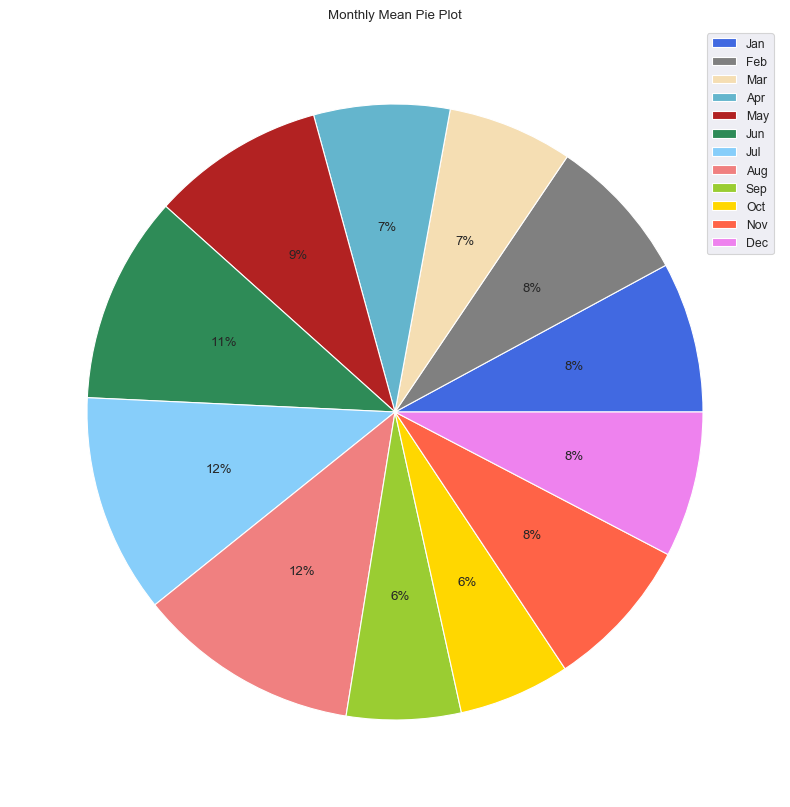

In [37]:
plt.rcParams["figure.figsize"] = (20,10)
monthly_mean=monthly_stats['mean']
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
patches, texts, autotexts = plt.pie(monthly_mean,startangle=0,autopct='%1.0f%%',colors=colors)
plt.legend(patches,categories,loc="best")
plt.title('Monthly Mean Pie Plot')

#### Here we can see that the month of June, July ang August has maximum number of mean delays. Well, you might be thinking the snow or winter is when the flights are delayed the most but it is wrong.   It’s actually harder for planes to fly in hot air because the air itself becomes much less dense. Sparser air molecules means the plane’s wings generate less lift, making takeoff more difficult.

#### However, we can see that the average mean delay time remains the same throughout but it slighlty increases during the winter and decrease during the Spring 

Text(0.5, 1.0, 'Count Pie Plot')

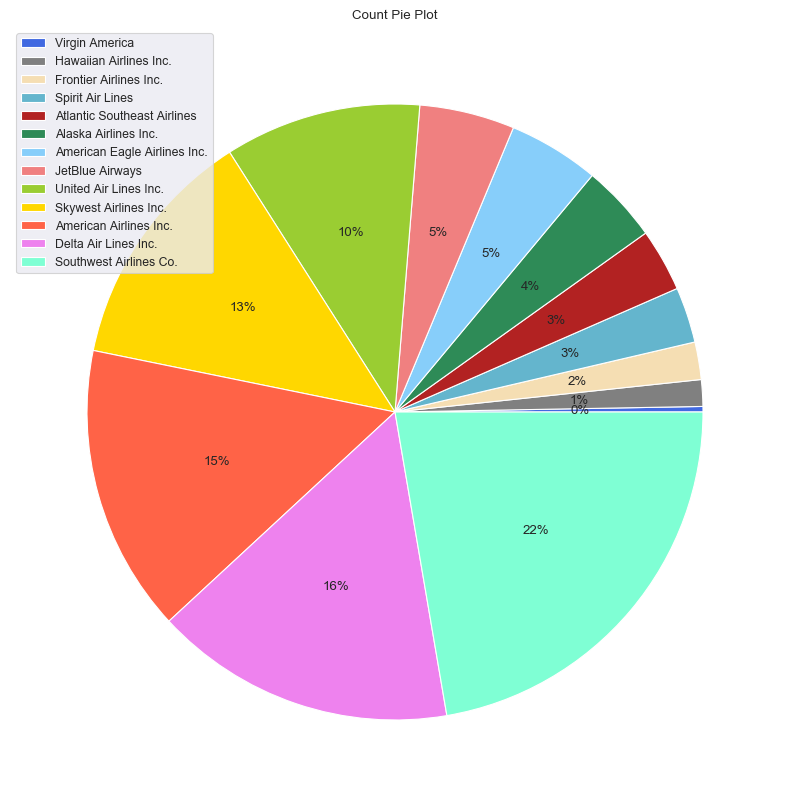

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
data=global_stats['count']
categories=global_stats.index
patches, texts, autotexts=plt.pie(data,startangle=0,autopct='%1.0f%%',colors=colors)
plt.legend(patches, categories, loc="best")
plt.title('Count Pie Plot')

#### The pie chart explains the number of flights in the sky as per the carrier

Text(0.5, 1.0, 'Mean Pie Plot')

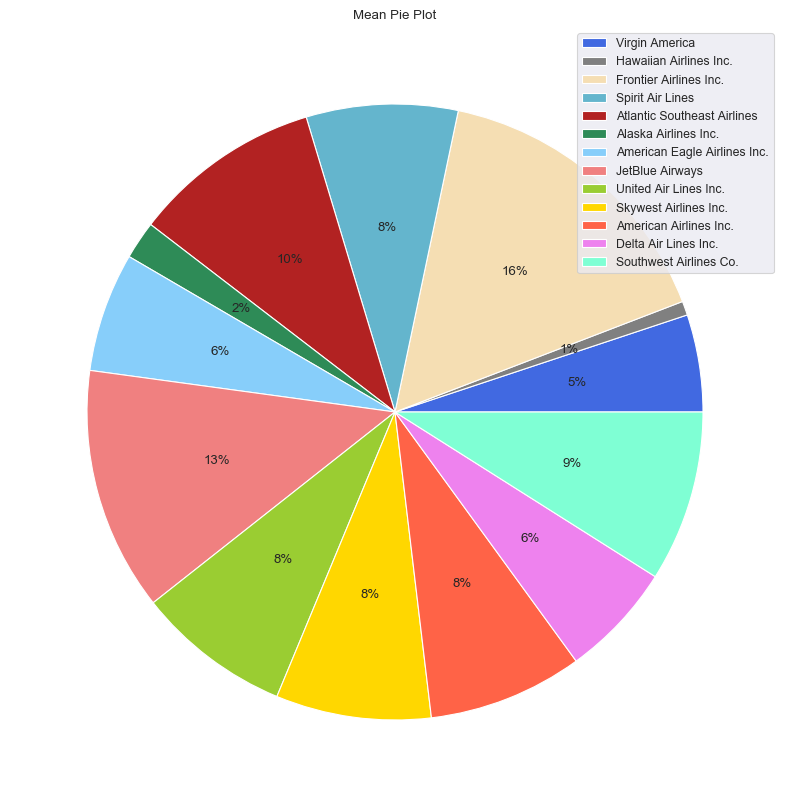

In [39]:
mean=global_stats['mean']
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
categories=global_stats.index
patches, texts, autotexts = plt.pie(mean,startangle=0,autopct='%1.0f%%',colors=colors)
plt.legend(patches,categories,loc="best")
plt.title('Mean Pie Plot')

#### The Pie chart explains the mean flight delay based on the carrier

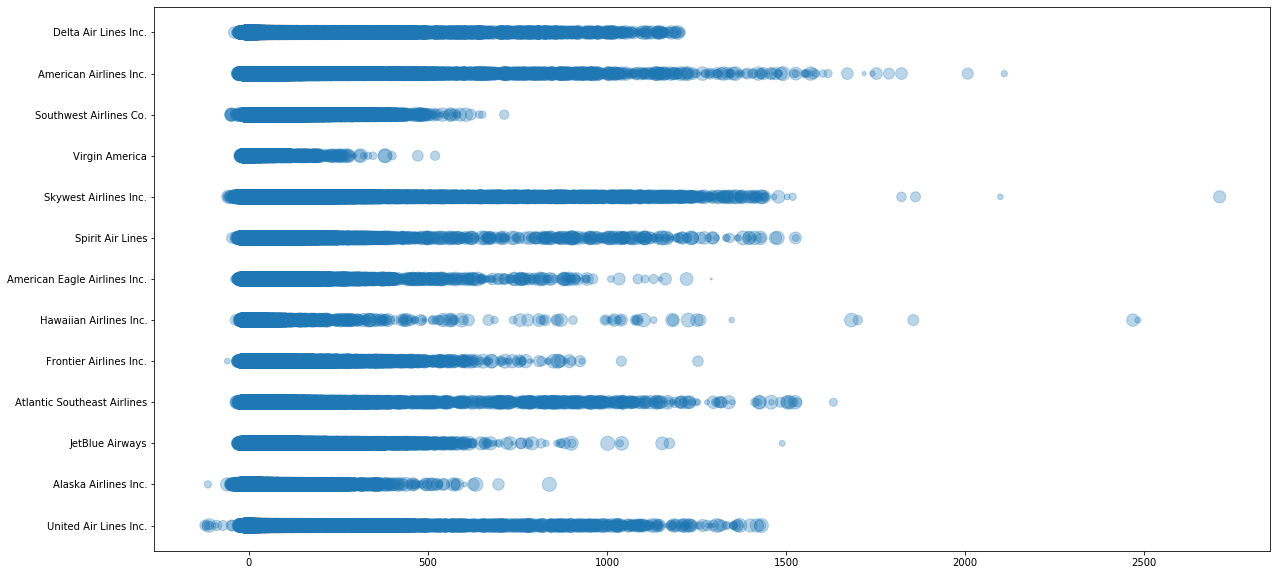

In [26]:
x_cordinates=df1['DEP_DELAY']
y_cordinates=df1['AIRLINE']
n=750
scale = 200.0 * np.random.rand(n)
plt.scatter(x_cordinates,y_cordinates,alpha=0.3,s= scale )

#### Considering the first pie chart that gives the percentage of flights per airline, we see that there is some disparity between the carriers. For exemple, Southwest Airlines accounts for  ∼ 22% of the flights which is similar to the number of flights chartered by the 6 tiniest airlines. However, if we have a look at the second pie chart, we see that here, on the contrary, the differences among airlines are less pronounced. Excluding Hawaiian Airlines and Alaska Airlines that report extremely low mean delays, we obtain that a value of  ∼ 11 ± 7 minutes would correctly represent all mean delays. Note that this value is quite low which mean that the standard for every airline is to respect the schedule!

#### Finally, the figure at the bottom makes a census of all the delays. This representation gives a feeling on the dispersion of data and put in perspective the relative homogeneity that appeared in the second pie chart. Indeed, we see that while maximum  delays are around 1500 minutes very rare cases are there the flights went above 1500 minutes

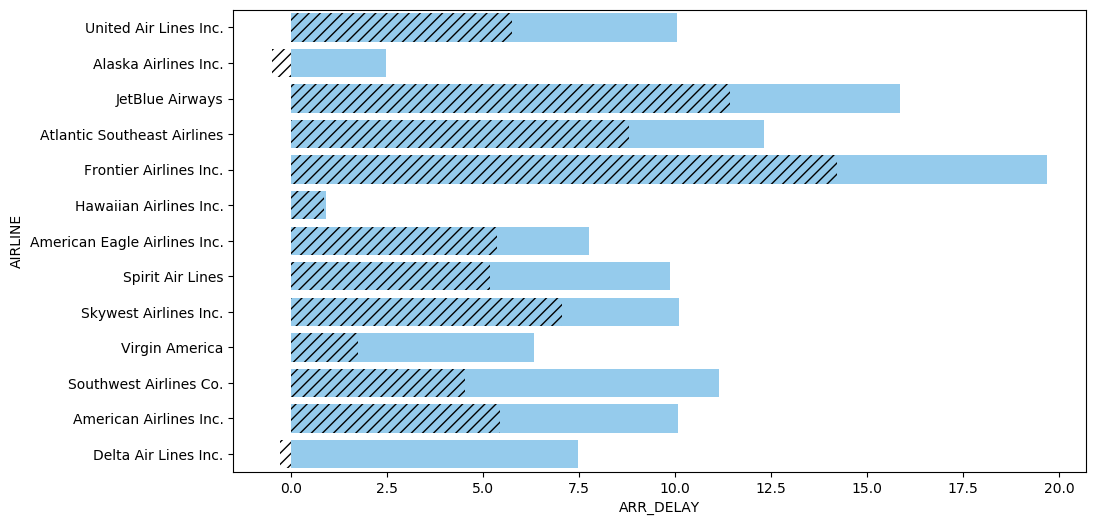

In [27]:
mpl.rcParams['hatch.linewidth'] = 2.0 
mpl.rcParams.update(mpl.rcParamsDefault)


fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEP_DELAY", y="AIRLINE", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="AIRLINE", data=df1, color="r", hatch = '///',
                 alpha = 0.0, ci=None)


#### On this figure, we can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival. In what follows, We will just consider the delays at departure but one has to keep in mind that this can differ from arrival delays.

In [28]:
abbr_companies.drop(index='US',inplace=True)

#### Here we are finding the number of airports at which flights work in USA

In [29]:
print("Number of airports: {}".format(len(df1['ORIGIN'].unique())))

Number of airports: 336


#### Here, I have a quick look at the number of destination airports for each airline

In [30]:
origin_nb = dict()
for carrier in abbr_companies.values:
    list_origin_airport = df1[df1['AIRLINE'] == carrier]['ORIGIN'].unique()
    origin_nb[carrier] = len(list_origin_airport)

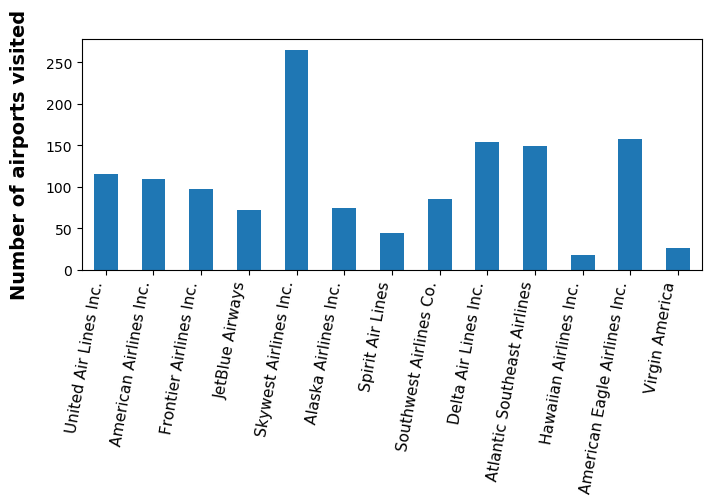

In [31]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

#### The above bar chart represent that the airports visited by the a carrier. As we can see that the Skywest Airline Inc. has maximum number of airports visited but only have 8% mean delay as per the above pie chart. Whereas, Jetblue airways has around 75 airport visited but have maximmum number of mean delay. We can conclude that the number of airports visited does not have any impact on the delay of the flights

In [32]:
airport_mean_delays = pd.DataFrame(pd.Series(df['Origin_airport'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)


In [33]:
for carrier in abbr_companies.values:
    df3 = df1[df1['AIRLINE']==carrier]
    test = df3['DEP_DELAY'].groupby(df1['ORIGIN']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

In [34]:
temp=df
identify_airport = temp.set_index('Origin_airport')['Origin_city'].to_dict()

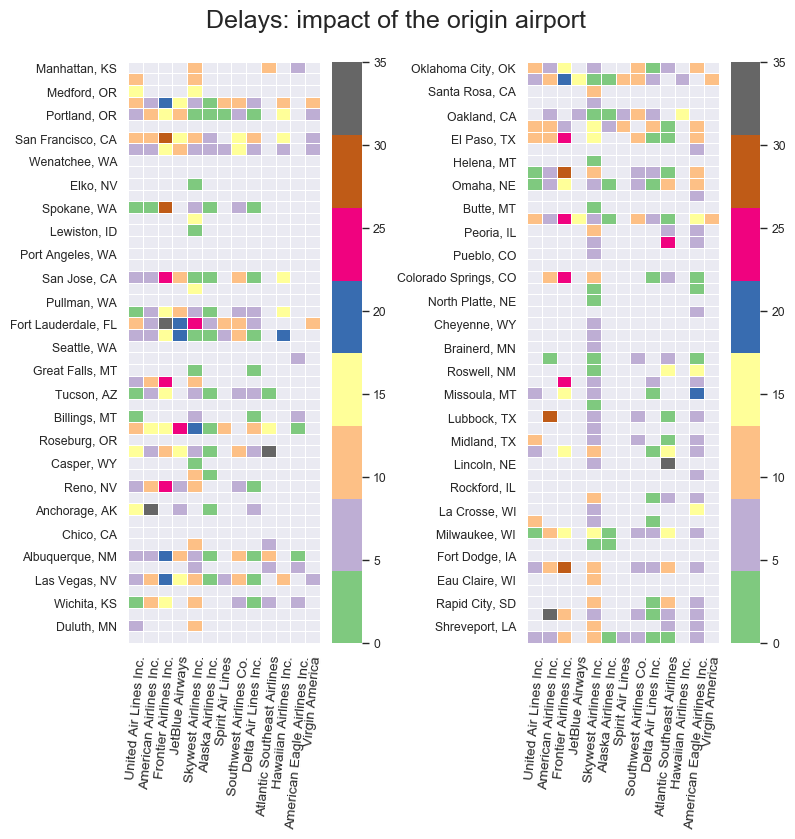

In [35]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

#### This figure allows to draw some conclusions. First, by looking at the data associated with the different airlines, we find the behavior we previously observed: for example, if we consider the right panel, it will be seen that the column associated with Frontier Airlines Inc mostly reports large delays, while the column associated with Delta Airlines is mainly associated with delays of less than 5 minutes. If we now look at the airports of origin, we will see that some airports favor late departures: see e.g. El Paso, SAn Fransico or Las Vegas. 

#### Finally, we can deduce from these observations that there is a high variability in average delays, both between the different airports but also between the different airlines. 

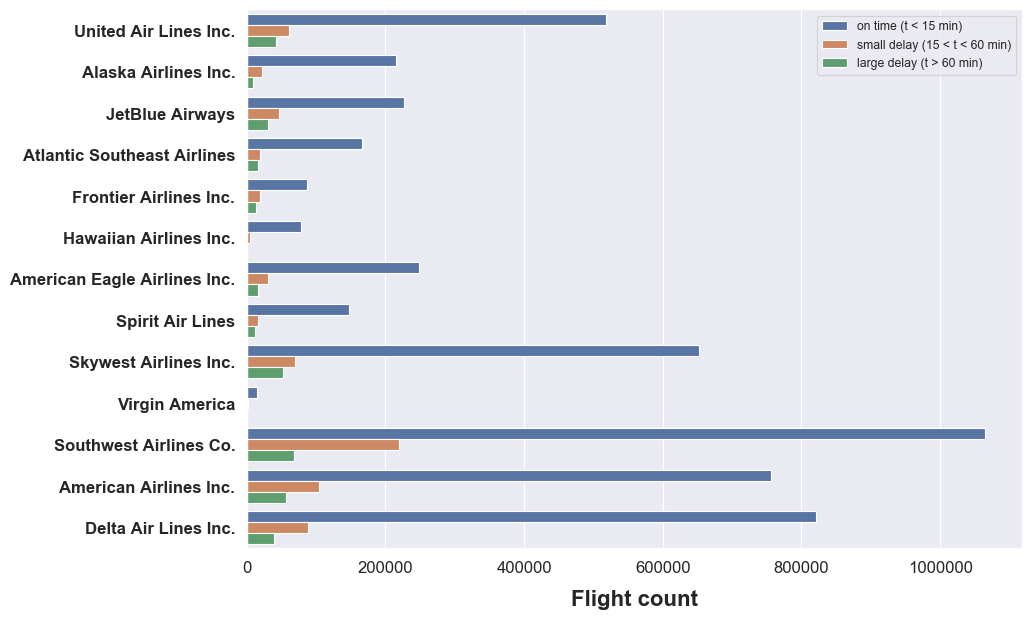

In [36]:
delay_type = lambda x:((0,1)[x > 15],2)[x > 60]
df1['DELAY_LEVEL'] = df1['DEP_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y=df1["AIRLINE"], hue=df1['DELAY_LEVEL'], data=df)

# We replace the abbreviations by the full names of the companies and set the labels
#labels = abbr_companies.values() 
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)


L = plt.legend()
L.get_texts()[0].set_text('on time (t < 15 min)')
L.get_texts()[1].set_text('small delay (15 < t < 60 min)')
L.get_texts()[2].set_text('large delay (t > 60 min)')
plt.show()

#### This figure gives a count of the delays of less than 5 minutes, those in the range 5 < t < 45 min and finally, the delays greater than 45 minutes. Hence, we wee that independently of the airline, delays greater than 45 minutes only account for a few percents. However, the proportion of delays in these three groups depends on the airline: as an example, Things are better for SoutWest Airlines since delays greater than 45 minutes are 4 times less frequent than delays in the range 5 < t < 45 min.

## Conclusion
#### This notebook with an exploration of the dataset, with the aim of understanding some properties of the delays registered by flights. This exploration gave us the occasion of using various vizualization tools offered by python and better understanding the patterns.